In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
gamma = 0.6
epsilon = 0.1
delta_check = epsilon*(1-gamma)/gamma

In [16]:
states = ['s1','s2']
actions = ['a1','a2','a3']

In [17]:
Va = (0,0)
Vb = (-10,10)

In [18]:
R = {}
R['s1'] = -10
R['s2'] = 10

In [46]:
P = {}
for s1 in states:
    for s2 in states:
        for a in actions:
            P[(s1,s2,a)]=0
P[('s1','s1','a1')]=0.2
P[('s2','s1','a1')]=0.8
P[('s1','s1','a2')]=0.4
P[('s2','s1','a2')]=0.6
P[('s2','s1','a3')]=1
P[('s1','s2','a1')]=0.1
P[('s2','s2','a1')]=0.9
P[('s1','s2','a3')]=0.5
P[('s2','s2','a3')]=0.5

In [47]:
U_new = {}
U_new['s1'] = Va[0]
U_new['s2'] = Va[1]
traj = []
traj.append([U_new['s1'],U_new['s2']])
while(True):
    U = U_new.copy()
    delta = 0
    
    for s in states:
        max_a = -1
        for act in actions:
            val = 0
            for next_s in states:
                val += P[(next_s,s,act)]*U[next_s]
            max_a = max(max_a,val)
        U_new[s] = R[s]+gamma*max_a
        
        delta = max(delta,abs(U_new[s]-U[s]))
    print(U_new)
    traj.append([U_new['s1'],U_new['s2']])
                
    
    if(delta<delta_check):
        break

{'s1': -10.0, 's2': 10.0}
{'s1': -4.0, 's2': 14.8}
{'s1': -1.1199999999999992, 's2': 17.752}
{'s1': 0.6511999999999993, 's2': 19.51888}
{'s1': 1.711328, 's2': 20.579267199999997}
{'s1': 2.3475603199999977, 's2': 21.215483968}
{'s1': 2.7292903808, 's2': 21.597214961920002}
{'s1': 2.958328977152002, 's2': 21.8262535022848}
{'s1': 3.095752101370879, 's2': 21.96367662986291}
{'s1': 3.178205977917745, 's2': 22.046130506208222}
{'s1': 3.2276783037249324, 's2': 22.095602832027502}


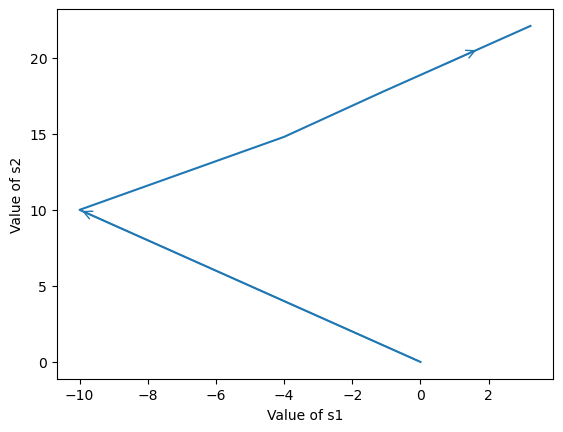

In [48]:
x = [i[0] for i in traj]
y = [i[1] for i in traj]
line = plt.plot(x, y)[0]
add_arrow(line,position = 0)
add_arrow(line,position = 1)
#plt.plot(x,y)
plt.xlabel('Value of s1')
plt.ylabel('Value of s2')
plt.show()

In [50]:
U_new = {}
U_new['s1'] = Vb[0]
U_new['s2'] = Vb[1]
traj = []
traj.append([U_new['s1'],U_new['s2']])
while(True):
    U = U_new.copy()
    delta = 0
    
    for s in states:
#         print(s)
        max_a = -1
        for act in actions:
            val = 0
            for next_s in states:
                val += P[(next_s,s,act)]*U[next_s]
            #print(act + " " +str(val))
            max_a = max(max_a,val)
        U_new[s] = R[s]+gamma*max_a
        
        delta = max(delta,abs(U_new[s]-U[s]))
    print(U_new)
    traj.append([U_new['s1'],U_new['s2']])
#     print("********************")
                
    
    if(delta<delta_check):
        break

{'s1': -4.0, 's2': 14.8}
{'s1': -1.1199999999999992, 's2': 17.752}
{'s1': 0.6511999999999993, 's2': 19.51888}
{'s1': 1.711328, 's2': 20.579267199999997}
{'s1': 2.3475603199999977, 's2': 21.215483968}
{'s1': 2.7292903808, 's2': 21.597214961920002}
{'s1': 2.958328977152002, 's2': 21.8262535022848}
{'s1': 3.095752101370879, 's2': 21.96367662986291}
{'s1': 3.178205977917745, 's2': 22.046130506208222}
{'s1': 3.2276783037249324, 's2': 22.095602832027502}


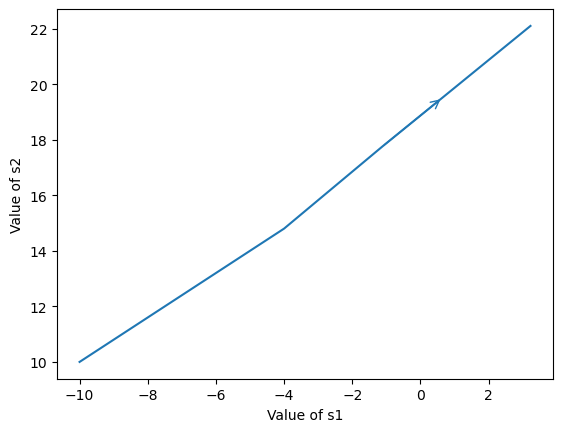

In [56]:
x = [i[0] for i in traj]
y = [i[1] for i in traj]
line = plt.plot(x, y)[0]
#add_arrow(line,position = 0)
add_arrow(line,position = -1)
plt.xlabel('Value of s1')
plt.ylabel('Value of s2')
plt.show()

In [12]:
U_new

{'s1': 3.2276783037249324, 's2': 22.095602832027502}

In [13]:
for s in states:
    max_a = -1
    act_opt = ""
    for act in actions:
        val = 0
        for next_s in states:
            val += P[(next_s,s,act)]*U_new[next_s]
        if(val>max_a):
            max_a = val
            act_opt = act
    print("State: "+s+"   Optimal action: "+act_opt)

State: s1   Optimal action: a3
State: s2   Optimal action: a1
